In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import yaml

In [66]:
# Load settings from config.yaml
with open("config.yaml", 'r') as file:
    config = yaml.safe_load(file)

In [67]:
op_price_data_path = config['general']['data']['op_price_historical_data_path']
avpi_data_path = config['general']['data']['avpi_historical_data_path']
pr_data_path = config['general']['data']['pr_historical_data_path']
lar_data_path = config['general']['data']['lar_historical_data_path']

In [68]:
op_price_data = pd.read_csv(op_price_data_path, parse_dates=['Date'])
avpi_data = pd.read_csv(avpi_data_path, parse_dates=['Date'])
pr_data = pd.read_csv(pr_data_path, parse_dates=['Date'])
lar_data = pd.read_csv(lar_data_path, parse_dates=['Date'])

In [69]:
print("OP Price Data Columns:")
print(op_price_data.columns)

print(f"\nAVPI Data Columns:")
print(avpi_data.columns)

print(f"\nPR Data Columns:")
print(pr_data.columns)

print(f"\nLAR Data Columns:")
print(lar_data.columns)

OP Price Data Columns:
Index(['Date', 'OP_Price'], dtype='object')

AVPI Data Columns:
Index(['Date', 'Volume Traded (30 days)', 'Actual Votable Supply', 'AVPI'], dtype='object')

PR Data Columns:
Index(['Date', 'Votable Supply', 'Circulating Supply', 'PR'], dtype='object')

LAR Data Columns:
Index(['Date', 'Volume Traded (24h)', 'Circulating Supply', 'LAR'], dtype='object')


### Drop the Columns That Are Not Required

In [70]:
avpi_data = avpi_data.drop(['Volume Traded (30 days)', 'Actual Votable Supply'], axis=1)
pr_data = pr_data.drop(['Votable Supply', 'Circulating Supply'], axis=1)
lar_data = lar_data.drop(['Volume Traded (24h)', 'Circulating Supply'], axis=1)

In [71]:
print(op_price_data.columns)
print(avpi_data.columns)
print(pr_data.columns)
print(lar_data.columns)

Index(['Date', 'OP_Price'], dtype='object')
Index(['Date', 'AVPI'], dtype='object')
Index(['Date', 'PR'], dtype='object')
Index(['Date', 'LAR'], dtype='object')


In [72]:
op_price_data.head()

,Date,OP_Price
0,2022-05-31,1.398424
1,2022-06-01,1.398424
2,2022-06-02,1.237603
3,2022-06-03,1.544824
4,2022-06-04,1.379352


In [73]:
avpi_data.head()

,Date,AVPI
0,2023-12-04,0.976378
1,2023-12-05,0.445840
2,2023-12-06,0.466266
3,2023-12-07,0.468346
4,2023-12-08,0.381139


In [74]:
pr_data.head()

,Date,PR
0,2022-06-05,0.165126
1,2022-06-06,0.166133
2,2022-06-07,0.165077
3,2022-06-08,0.164139
4,2022-06-09,0.170625


In [75]:
lar_data.head()

,Date,LAR
0,2023-12-04,0.054445
1,2023-12-05,0.184733
2,2023-12-06,0.112463
3,2023-12-07,0.114737
4,2023-12-08,0.249292


In [76]:
print("OP_Price :")
print("Min -",round(op_price_data['OP_Price'].min(), 2),", Max -",round(op_price_data['OP_Price'].max(), 2))

print("\nAVPI :")
print("Min -",round(avpi_data['AVPI'].min(), 2),", Max -",round(avpi_data['AVPI'].max(), 2))

print("\nPR :")
print("Min -",round(pr_data['PR'].min(), 2),", Max -",round(pr_data['PR'].max(), 2))

print("\nLAR :")
print("Min -",round(lar_data['LAR'].min(), 2),", Max -",round(lar_data['LAR'].max(), 2))

OP_Price :
Min - 0.45 , Max - 4.69

AVPI :
Min - 0.18 , Max - 0.98

PR :
Min - 0.06 , Max - 0.19

LAR :
Min - 0.03 , Max - 0.52


### Merge all Dataframes

In [77]:
merged_data = pd.merge(op_price_data, avpi_data, on='Date', how='inner')
merged_data = pd.merge(merged_data, pr_data, on='Date', how='inner')
merged_data = pd.merge(merged_data, lar_data, on='Date', how='inner')

In [78]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      363 non-null    datetime64[ns]
 1   OP_Price  363 non-null    float64       
 2   AVPI      363 non-null    float64       
 3   PR        363 non-null    float64       
 4   LAR       363 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 14.3 KB


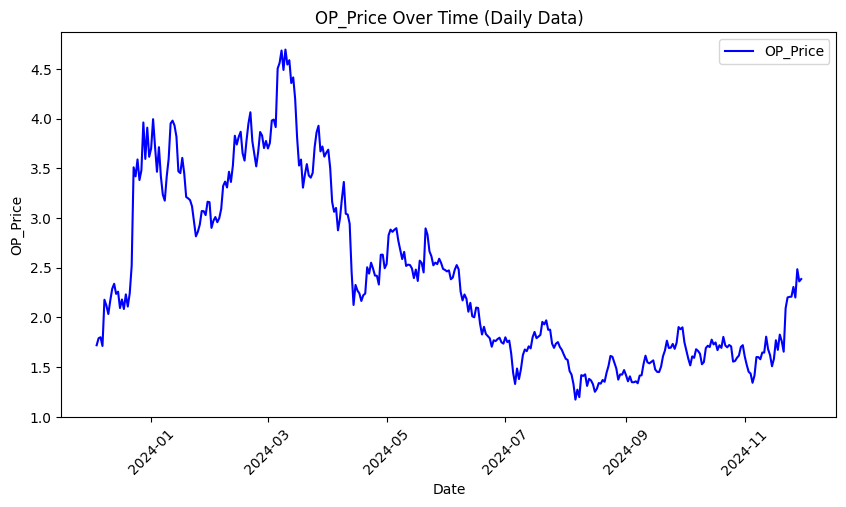

In [79]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the data
ax.plot(merged_data['Date'], merged_data["OP_Price"], color='blue', label="OP_Price")
ax.plot()

# Labels and title
ax.set_xlabel("Date")
ax.set_ylabel("OP_Price")
ax.set_title("OP_Price Over Time (Daily Data)")
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


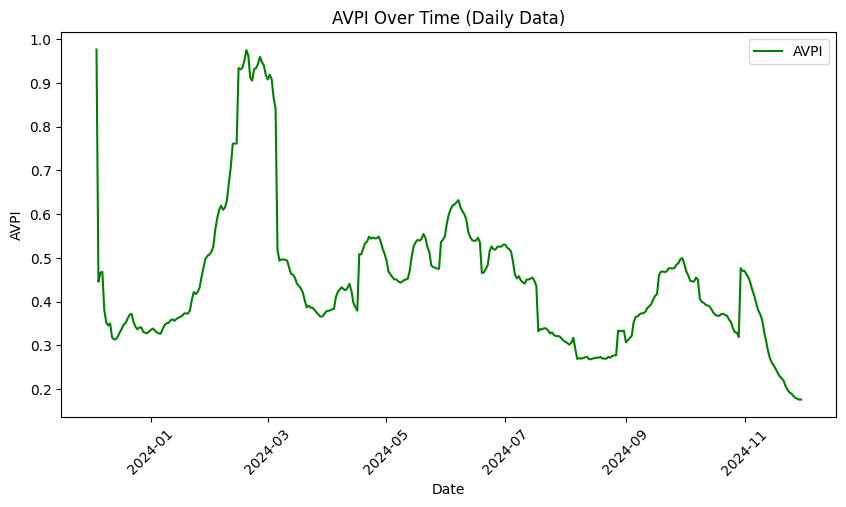

In [80]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the data
ax.plot(merged_data['Date'], merged_data["AVPI"], color='green', label="AVPI")
ax.plot()

# Labels and title
ax.set_xlabel("Date")
ax.set_ylabel("AVPI")
ax.set_title("AVPI Over Time (Daily Data)")
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


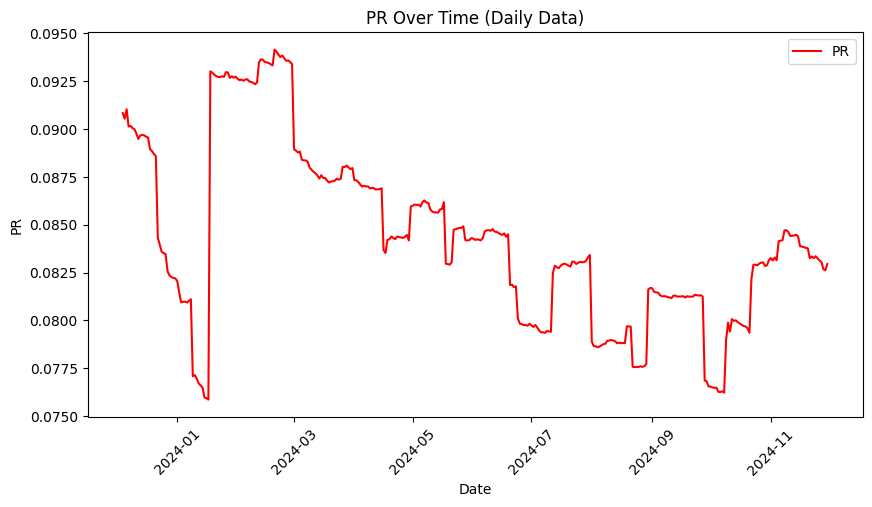

In [81]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the data
ax.plot(merged_data['Date'], merged_data["PR"], color='red', label="PR")
ax.plot()

# Labels and title
ax.set_xlabel("Date")
ax.set_ylabel("PR")
ax.set_title("PR Over Time (Daily Data)")
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


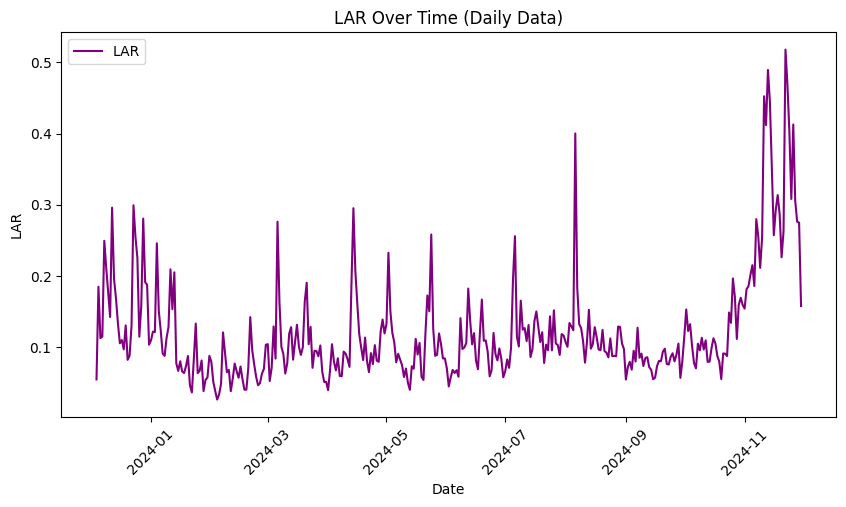

In [82]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the data
ax.plot(merged_data['Date'], merged_data["LAR"], color='purple', label="LAR")
ax.plot()

# Labels and title
ax.set_xlabel("Date")
ax.set_ylabel("LAR")
ax.set_title("LAR Over Time (Daily Data)")
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


### Merge the Votable Supply and Circulating Supply

In [83]:
vs_historical_data_path = config['general']['data']['vs_historical_data_path']
cs_historical_data_path = config['general']['data']['cs_historical_data_path']

In [84]:
vs_data = pd.read_csv(vs_historical_data_path, parse_dates=['Date'])
cs_data = pd.read_csv(cs_historical_data_path, parse_dates=['Date'])

In [85]:
vs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 910 entries, 0 to 909
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            910 non-null    datetime64[ns]
 1   Votable Supply  910 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 14.3 KB


In [86]:
cs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 910 entries, 0 to 909
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                910 non-null    datetime64[ns]
 1   Circulating Supply  910 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 14.3 KB


In [87]:
vs_data.head()

,Date,Votable Supply
0,2022-06-05,35460574.01
1,2022-06-06,35676686.11
2,2022-06-07,35450013.62
3,2022-06-08,35248663.35
4,2022-06-09,36641371.68


In [88]:
cs_data.head()

,Date,Circulating Supply
0,2022-06-05,214748364.8
1,2022-06-06,214748364.8
2,2022-06-07,214748364.8
3,2022-06-08,214748364.8
4,2022-06-09,214748364.8


In [89]:
merged_data = pd.merge(merged_data, vs_data, on='Date', how='left')
merged_data = pd.merge(merged_data, cs_data, on='Date', how='left')

In [90]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                363 non-null    datetime64[ns]
 1   OP_Price            363 non-null    float64       
 2   AVPI                363 non-null    float64       
 3   PR                  363 non-null    float64       
 4   LAR                 363 non-null    float64       
 5   Votable Supply      363 non-null    float64       
 6   Circulating Supply  363 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 20.0 KB


### Round the decimals

In [91]:
merged_data['Votable Supply'] = round(merged_data['Votable Supply'], 2)
merged_data['Circulating Supply'] = round(merged_data['Circulating Supply'], 2)

### Save the Data to CSV

In [92]:
merged_historical_data_path = config['prepare_historical_data']['data']['merged_historical_data_path']

In [93]:
merged_data.to_csv(merged_historical_data_path, index=False)